<a href="https://colab.research.google.com/github/vapaul10/AI_Samples/blob/main/Bank_Marketing_for_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Banking Analyst and Trial Run of Python**

#**I. Python Setup Section** **bold text**

In [1]:
##Python Packages
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
import seaborn as sn

#importing the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import *

In [2]:
###Python Data Table

In [3]:
#Install python datatable which is the same as data.table() in R
!pip install datatable
import datatable as dt

from datatable import (dt, f, by, ifelse, update, sort,
                       count, min, max, mean, sum, rowsum)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 MB 7.0 MB/s eta 0:00:00


In [4]:
###H2O.ai for Python

In [5]:
#Python h2o.ai

#H2o is the Machine Learning package we will be using. It has both an R implementation and a Python implemenation.
#The h2o.init() is commented out below because we are not going to use it for this lecture.

!apt-get install default-jre
!java -version

! pip install h2o

#import h2o

#h2o.init()
#h2o.shutdown()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 32 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

#**II. Python Data Loading**

In [6]:
#Data Load in Python
#bank_p = dt.fread("https://raw.githubusercontent.com/jjghockey/DESC624/main/bank-additional-full.csv")
bank_p = dt.fread("https://raw.githubusercontent.com/vapaul10/DESC624PredictiveAnalytics/Datasets/bank-additional-full.csv")
bank_p.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,…,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,…,93.994,−36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,…,93.994,−36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,…,93.994,−36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,…,93.994,−36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,…,93.994,−36.4,4.857,5191,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,…,93.994,−36.4,4.857,5191,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,…,93.994,−36.4,4.857,5191,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,…,93.994,−36.4,4.857,5191,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,…,93.994,−36.4,4.857,5191,no


In [7]:
bank_p.shape

(41188, 21)

#**III. Python Data Exploration**
#     Descriptive Statistics
####  Categorical Table Count (Y/N),
####  Datatable:  Mean, Standard Deviation, Minimum, Maximum, 25%, 50%, 70%


###** Python function for summary() only uses numeric values, so you will have to build categorical tables on your own.**##

In [8]:
##Bank Data Attributes
bank_p.names

('age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y')

###Categorical tables using Python

In [9]:
#Categorical Tables in Python
bank_p['count'] = 1      #Build a new variable in order to count rows in the data
bank_p[f.y=="yes",'y1']=1
bank_p[f.y=="no",'y1']=0

bank_p[:, sum(f.count), by('y', 'y1')]  #Recode y into a 0/1 dummy variable

,y,y1,count
,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,0,36548
1,yes,1,4640


In [10]:
###Panda Object:  Needed in Python to Convert to a Datatable
bank_pd=bank_p.to_pandas()  #Convert the Datatable object to Pandas object
summary = bank_pd.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [11]:
### The Pandas Datatable Format with Attribute names.
bank_pd.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,count,y1
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0


H2O Setup

In [12]:
import h2o

h2o.init()
#h2o.shutdown()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_tbbtgwm
  JVM stdout: /tmp/tmp_tbbtgwm/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_tbbtgwm/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_unknownUser_0pgezw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [13]:
#A. Creating a dataframe
bank_pd = bank_p.to_pandas()

#1. Convert variables to factor variables for modeling
bank_pd['job'],_=pd.factorize(bank_pd['job'], sort=True)
bank_pd['marital'],_=pd.factorize(bank_pd['marital'], sort=True)
bank_pd['education'],_=pd.factorize(bank_pd['education'], sort=True)
bank_pd['default'],_=pd.factorize(bank_pd['default'], sort=True)
bank_pd['housing'],_=pd.factorize(bank_pd['housing'], sort=True)
bank_pd['loan'],_=pd.factorize(bank_pd['loan'], sort=True)
bank_pd['poutcome'],_=pd.factorize(bank_pd['poutcome'], sort=True)
bank_pd['contact'],_=pd.factorize(bank_pd['contact'], sort=True)
bank_pd['y'],_=pd.factorize(bank_pd['y'], sort=True)

#2.  Training and Test Split
# Creating a dataframe with 80%
# values of original dataframe
bank_pd_trn = bank_pd.sample(frac = 0.8)

#3.  Creating dataframe with
# rest of the 80% values
bank_pd_tst = bank_pd.drop(bank_pd_trn.index)

bank_pd_tst.describe()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,count,y1
count,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,...,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.0,8238.000000
mean,39.924739,3.666303,1.174678,3.735615,0.205147,1.073319,0.334790,0.357004,261.596747,2.562030,...,0.178563,0.926803,0.079934,93.572433,-40.610427,3.614215,5167.287849,0.119325,1.0,0.119325
std,10.309743,3.570645,0.610065,2.131701,0.404134,0.986353,0.731923,0.479145,267.237785,2.775695,...,0.502795,0.368885,1.560584,0.575160,4.582512,1.732637,71.611651,0.324190,0.0,0.324190
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,1.0,0.000000
25%,32.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,103.000000,1.000000,...,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,1.0,0.000000
50%,38.000000,2.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,180.000000,2.000000,...,0.000000,1.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000,1.0,0.000000
75%,47.000000,7.000000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,321.000000,3.000000,...,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,1.0,0.000000
max,95.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,3643.000000,43.000000,...,6.000000,2.000000,1.400000,94.767000,-26.900000,5.000000,5228.100000,1.000000,1.0,1.000000


In [14]:
#4. Set training and test set variables for the model.
trn=bank_pd_trn.loc[:,['y', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous','poutcome']]
tst=bank_pd_tst.loc[:,['y', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous','poutcome']]

In [15]:
#5. Load data into h2o
trn_h = h2o.H2OFrame(trn)
tst_h = h2o.H2OFrame(tst)

x = trn_h.columns
y = "y"
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [16]:
#6. Response variable MUST be a factor variable
trn_h[y] = trn_h[y].asfactor()
tst_h[y] = tst_h[y].asfactor()

####**Python Naive Bayes Example**###

In [17]:
#B. Tuning Parameters
#Naive Bayes
hyper_params_nb = {
    'laplace':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'min_sdev':[0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1],
    'eps_sdev':[0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1],
    'min_prob':[0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1],
    'eps_prob':[0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1]
}
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}

In [18]:
#C. Train Naive Bayes
from h2o.estimators import H2ONaiveBayesEstimator
from h2o.grid.grid_search import H2OGridSearch
nb_grid1 = H2OGridSearch(model=H2ONaiveBayesEstimator,
                         grid_id='nb_grid1',
                         hyper_params=hyper_params_nb,
                         search_criteria=search_criteria
                         )

nb_grid1.train(x=x, y=y,
               training_frame=trn_h,
               stopping_metric = "misclassification", stopping_tolerance = 1e-3,
               stopping_rounds = 3,
               nfolds = 5, fold_assignment = "Modulo",
               keep_cross_validation_predictions = True,
               seed=-1
               )
#Get the grid results, sorted by validation error
nb_gridperf1 = nb_grid1.get_grid(sort_by='err', decreasing=True)

naivebayes Grid Build progress: |████████████████████████████████████████████████| (done) 100%


In [19]:
#D. Evaluate
best_nb1 = nb_gridperf1.models[0]

#1. AUC
best_nb_perf1 = best_nb1.model_performance(tst_h)
best_nb_perf1.auc()

0.6808417809866278

In [20]:
#2. Overall Performance metrics
best_nb_perf1

ModelMetricsBinomial: naivebayes
** Reported on test data. **

MSE: 0.12279816914357676
RMSE: 0.35042569703658544
LogLoss: 0.4031119018233595
Mean Per-Class Error: 0.3882343744413121
AUC: 0.6808417809866278
AUCPR: 0.22741799362462198
Gini: 0.3616835619732557

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15535916907561895
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      6050  1205  0.1661   (1205.0/7255.0)
1      600   383   0.6104   (600.0/983.0)
Total  6650  1588  0.2191   (1805.0/8238.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.155359     0.297939  227
max f2                       0.06046      0.45237   325
max f0point5                 0.329072     0.280046  182
max accuracy                 0.809126     0.881282  11
max precision                0.809126     0.54902   11
max recall                   0.00390205   1         399
max specificity              0.854524     0.999862  0
max absolute_mcc             0.329072     0.186169  182
max min_per_class_accuracy   0.109042     0.629635  273
max mean_per_class_accuracy  0.101123     0.634095  283
max tns                      0.854524     7254      0
max fns                      0.854524     983       0
max fps                      0.00390205   7255      399
max tps                      0.00390205   983       399
max tnr                      0.854524     0.999862  0
max fnr                      0.854524     1         0
max fpr                      0.00390205   1         399
max tpr                      0.00390205   1         399

Gains/Lift Table: Avg response rate: 11.93 %, avg score: 14.72 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100753                   0.799733           4.03878   4.03878            0.481928         0.818405    0.481928                    0.818405            0.0406918       0.0406918                  303.878   303.878            0.0347648
2        0.0201505                   0.784251           2.22133   3.13005            0.26506          0.791314    0.373494                    0.804859            0.0223805       0.0630722                  122.133   213.005            0.0487373
3        0.0301044                   0.752468           3.88363   3.37922            0.463415         0.769047    0.403226                    0.793018            0.0386572       0.101729                   288.363   237.922            0.0813297
4        0.040908                    0.739444           1.5066    2.88467            0.179775         0.745996    0.344214                    0.7806              0.0162767       0.118006                   50.6601   188.467            0.0875444
5        0.0508619                   0.725062           1.32861   2.58014            0.158537         0.733217    0.307876                    0.771327            0.0132248       0.131231                   32.8611   158.014            0.0912585
6        0.100024                    0.517273           1.53125   2.06461            0.182716         0.656763    0.246359                    0.715018            0.0752798       0.206511                   53.1246   106.461            0.120915
7        0.15732                     0.174523           2.25491   2.13392            0.269068         0.326573    0.25463                     0.573547            0.129196        0.335707                   125.491   113.392            0.202557
8    

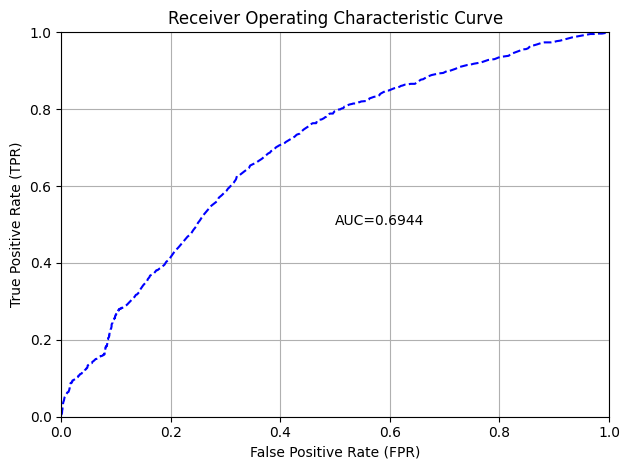

([0.000273224043715847,
  0.000546448087431694,
  0.0012295081967213116,
  0.001366120218579235,
  0.0015027322404371586,
  0.0015027322404371586,
  0.001639344262295082,
  0.002185792349726776,
  0.002185792349726776,
  0.002459016393442623,
  0.0031420765027322405,
  0.0031420765027322405,
  0.0034153005464480873,
  0.003551912568306011,
  0.004918032786885246,
  0.005737704918032787,
  0.006284153005464481,
  0.009972677595628416,
  0.01051912568306011,
  0.011202185792349727,
  0.012704918032786885,
  0.013114754098360656,
  0.014344262295081968,
  0.014754098360655738,
  0.014890710382513661,
  0.015300546448087432,
  0.01557377049180328,
  0.015983606557377048,
  0.016530054644808743,
  0.01721311475409836,
  0.01762295081967213,
  0.018989071038251367,
  0.01980874316939891,
  0.020218579234972677,
  0.020901639344262295,
  0.021994535519125682,
  0.022814207650273224,
  0.02418032786885246,
  0.02691256830601093,
  0.02745901639344262,
  0.028688524590163935,
  0.03046448087431

In [ ]:
#3. ROC
best_nb_perf1.plot(type='roc')

####**Python Naive Bayes scikit learn example**####

In [ ]:
X_train = trn[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous','poutcome']] #predictors

y_train = trn[['y']] #target


X_test = tst[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous','poutcome']] #predictors

y_test= tst[['y']] #target

In [ ]:
#B. Run Model
#1. Fit the model
NB = GaussianNB()
nb_01 = NB.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#2. Predictions
prediction = nb_01.predict(X_test) #  Run Predictions

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

y=y_test.loc[:,['y']]

fpr, tpr, thresholds = metrics.roc_curve(y, prediction)
accuracy_score(y, prediction)

0.8316338917212915

In [ ]:
3. #AUC
metrics.auc(fpr, tpr)

0.6003915318404229

In [ ]:
#D. Evaluate
best_nb1 = nb_gridperf1.models[0]

In [ ]:
#4. Variable Important
#H2OValueError: Variable importance plot is not available for this type of model (naivebayes).
#best_nb1.varimp_plot(num_of_features=12)

In [ ]:
#Confusion Matrix
y_predict = pd.DataFrame(prediction,index = y_test.index, columns = ['predict'])
cm_nb = confusion_matrix(y_test, y_predict)
cm_nb_df = pd.DataFrame(cm_nb)
cm_nb_df

,0,1
0,6573,747
1,640,278


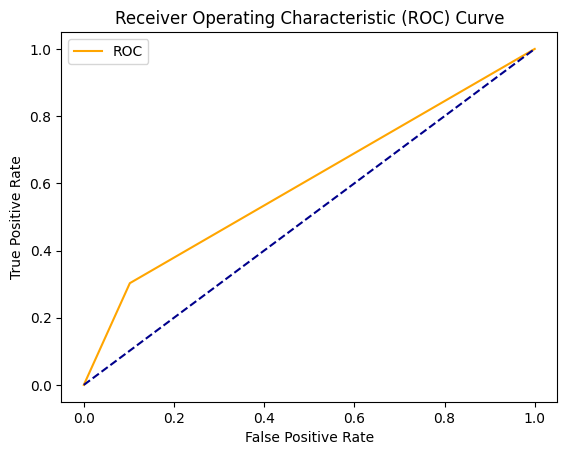

In [ ]:
#ROC Curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

###**Python Probability Exercise**###

In [ ]:
bank_p.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,…,euribor3m,nr.employed,y,count,y1
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,…,4.857,5191,no,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,…,4.857,5191,no,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,…,4.857,5191,no,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,…,4.857,5191,no,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,…,4.857,5191,no,1,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,…,4.857,5191,no,1,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,…,4.857,5191,no,1,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,…,4.857,5191,no,1,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,…,4.857,5191,no,1,0


In [ ]:
###  Summary Table on Martial Status
bank_p[:, sum(f.count), by('marital') ]  #Summary table of Marital Status


,marital,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,divorced,4612
1,married,24928
2,single,11568
3,unknown,80


#** Val's Descriptive Trial**

In [ ]:
### Graph Histo plot (capture the idea from https://ethanweed.github.io/pythonbook/03.01-descriptives.html)
##bank_p = sn.histoplot(age)

### bank_p(plt.xlabel = "Age ",
###       plt.ylabel = "Frequency")

#####**Python Probability Exercise**##

In [ ]:
bank_p.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,…,euribor3m,nr.employed,y,count,y1
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,…,4.857,5191,no,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,…,4.857,5191,no,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,…,4.857,5191,no,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,…,4.857,5191,no,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,…,4.857,5191,no,1,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,…,4.857,5191,no,1,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,…,4.857,5191,no,1,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,…,4.857,5191,no,1,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,…,4.857,5191,no,1,0


#**IV. Python Data Processing**

In [ ]:
###Build a new variable in order to count rows in the data
bank_p['count'] = 1

In [ ]:
# Show the name of the attributes
bank_p.names

('age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'count',
 'y1')

####IV. Data Processing -----------------------------------
####A. Clean Data

####IV. Data Processing (cont.)------------------------------
####**B. Filter the Data**#

####IV. Data Processing (cont.)------------------------------
#####C. Build Features

####*Convert from Data Table**####

In [ ]:
bank_pd=bank_p.to_pandas()
summary = bank_pd.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


###**Euribor**###
#####Euribor is an overnight interbank rate comprised of the average interest
#####rates from a panel of large European banks that are used for lending to one
#####another in ...:##

####IV. Data Processing (cont.)------------------------------
####**D.  Training and Test Split**#

In [ ]:
#D.  Training and Test Split
bank_pd=bank_p.to_pandas()
# Creating a dataframe with 90%
# values of original dataframe
bank_pd_trn = bank_pd.sample(frac = 0.9)

####**3.  Creating dataframe with rest of the 10% values**#

In [ ]:
#3.  Creating dataframe with rest of the 10% values
bank_pd_tst = bank_pd.drop(bank_pd_trn.index)
print(bank_pd_trn.shape)
print(bank_pd_tst.shape)

(37069, 23)
(4119, 23)


In [ ]:
bank_p[:, sum(f.count), by('default')]

,default,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,32588
1,unknown,8597
2,yes,3


####IV. Data Processing (cont.)------------------------------
####**E. Explore Features**#


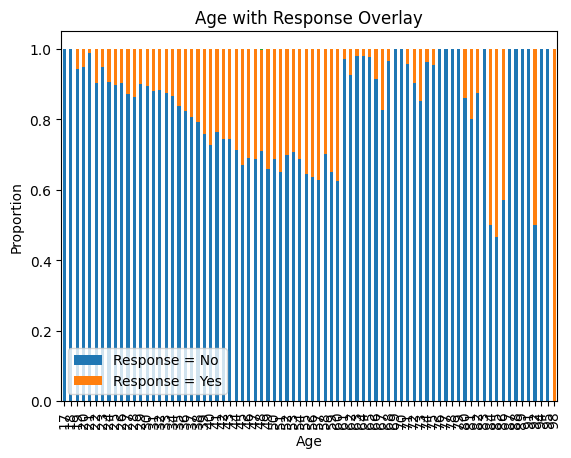

In [ ]:
#E. Explore Features

#1. Age and Response
crosstab_01 = pd.crosstab(bank_pd_trn['age'], bank_pd_trn['default'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Response = No', 'Response = Yes'])
plt.title('Age with Response Overlay')
plt.xlabel('Age'); plt.ylabel('Proportion'); plt.show()

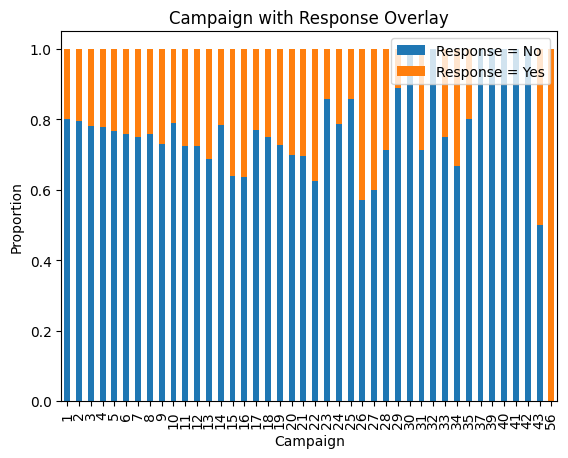

In [ ]:
#2. campaign and Response
crosstab_01 = pd.crosstab(bank_pd_trn['campaign'], bank_pd_trn['default'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Response = No', 'Response = Yes'])
plt.title('Campaign with Response Overlay')
plt.xlabel('Campaign'); plt.ylabel('Proportion'); plt.show()

In [ ]:
#3. Housing and Response
crosstab_01 = pd.crosstab(bank_pd_trn['housing'].round(0), bank_pd_trn['default'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = False)

plt.legend(['Response = No', 'Response = Yes'])
plt.title('Housing with Response Overlay')
plt.xlabel('Own their House'); plt.ylabel('Proportion'); plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable rint method

In [ ]:
##4. Employed and Response
crosstab_01 = pd.crosstab(bank_pd_trn['nr.employed'], bank_pd_trn['default'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = False)

#plt.legend(['Employed in Bank = No', 'Employed = Yes'])
plt.title('Employed with Response Overlay')
plt.xlabel('# of People Employed in the Bank'); plt.ylabel('Proportion'); plt.show()

In [ ]:
#5. Consumer Price Index and Response
crosstab_01 = pd.crosstab(bank_pd_trn['cons.price.idx'], bank_pd_trn['default'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Response = No', 'Response = Yes'])
plt.title('Consumer Price Index with Response Overlay')
plt.xlabel('Consumer Price Index'); plt.ylabel('Proportion'); plt.show()

In [ ]:
#6. Euribor3m (Overnight bank rate) and Respons
crosstab_01 = pd.crosstab(bank_pd_trn['euribor3m'], bank_pd_trn['default'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='line', stacked = False)

plt.legend(['Response = No', 'Response = Yes'])
plt.title('Euribor with Response Overlay')
plt.xlabel('Euribor (overnight bank rate)'); plt.ylabel('Proportion'); plt.show()

In [ ]:
#7. Campaign and Response
crosstab_01 = pd.crosstab(bank_pd_trn['campaign'], bank_pd_trn['default'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Response = No', 'Response = Yes'])
plt.title('Campaign with Response Overlay')
plt.xlabel('Campaign'); plt.ylabel('Proportion'); plt.show()

#**V. Python Data Analysis**

##h2o Setup

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

In [ ]:
import h2o

h2o.init()
#h2o.shutdown()

####A. Creating a dataframe
#####1. Convert variables to factor variables for modeling

In [ ]:
#A. Creating a dataframe
#1. Convert variables to factor variables for modeling
bank_pd=bank_p.to_pandas()
bank_pd['age'],_=pd.factorize(bank_pd['age'], sort=True)
bank_pd['education'],_=pd.factorize(bank_pd['education'], sort=True)
bank_pd['marital'],_=pd.factorize(bank_pd['marital'], sort=True)
bank_pd['default'],_=pd.factorize(bank_pd['default'], sort=True)
bank_pd['housing'],_=pd.factorize(bank_pd['housing'], sort=True)
bank_pd['loan'],_=pd.factorize(bank_pd['loan'], sort=True)
bank_pd['month'],_=pd.factorize(bank_pd['month'], sort=True)
bank_pd['day_of_week'],_=pd.factorize(bank_pd['day_of_week'], sort=True)
bank_pd['duration'],_=pd.factorize(bank_pd['duration'], sort=True)
bank_pd['campaign'],_=pd.factorize(bank_pd['campaign'], sort=True)
bank_pd['pdays'],_=pd.factorize(bank_pd['pdays'], sort=True)
bank_pd['previous'],_=pd.factorize(bank_pd['previous'], sort=True)
bank_pd['poutcome'],_=pd.factorize(bank_pd['poutcome'], sort=True)
bank_pd['emp.var.rate'],_=pd.factorize(bank_pd['emp.var.rate'], sort=True)
bank_pd['cons.price.idx'],_=pd.factorize(bank_pd['cons.price.idx'], sort=True)
bank_pd['cons.conf.idx'],_=pd.factorize(bank_pd['cons.conf.idx'], sort=True)
bank_pd['euribor3m'],_=pd.factorize(bank_pd['euribor3m'], sort=True)
bank_pd['nr.employed'],_=pd.factorize(bank_pd['nr.employed'], sort=True)
bank_pd['y'],_=pd.factorize(bank_pd['y'], sort=True)


bank_p=dt.Frame(bank_pd)

#2.  Training and Test Split
#See Above

####A. Creating a dataframe(cont.)
#####2.  Training and Test Split

In [ ]:
#2.  Training and Test Split
#See Above

####A. Creating a dataframe(cont.)
#####3.  Creating a dataframe with

In [ ]:
#3.  Creating dataframe with
bank_pd_trn.describe()

####A. Creating a dataframe(cont.)
#####4.  Set training and test set variables for the model.

In [ ]:
#4. Set training and test set variables for the model.
xnames=['age', 'education', 'martial', 'default', 'housing', 'loan', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
trn=bank_pd_trn.loc[:,['age', 'education', 'martial', 'default', 'housing', 'loan', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]
tst=bank_pd_tst.loc[:,['age', 'education', 'martial', 'default', 'housing', 'loan', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]

####A. Creating a dataframe(cont.)
#####5.  Load data into h2o

In [ ]:
#5. Load data into h2o
trn_h = h2o.H2OFrame(trn)
tst_h = h2o.H2OFrame(tst)

x = trn_h.columns
y = "DEF"
x.remove('DEF')

##**Logistic Regression**#

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html?highlight=generalized%20linear%20models



###**Logistic Regression**#
####C. GLM Hyper Tuning Parameters

In [ ]:
#C. GLM Hyper Tuning Parameters
hyper_params_glm={
    'alpha':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}

#Search Criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 11, 'seed': -1}

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

glm_grid1 = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                          grid_id='glm_grid1',
                          hyper_params=hyper_params_glm,
                          search_criteria=search_criteria
                         )
glm_grid1.train(x=x, y=y,
                training_frame=trn_h,
                stopping_metric = "AUC", stopping_tolerance = 1e-3,
							  stopping_rounds = 3,
							  nfolds = 5, fold_assignment = "Modulo",
                balance_classes = True,
							  keep_cross_validation_predictions = True,
                standardize = True,
                family = "binomial",
                lambda_search=False,
                seed=-1
               )
glm_gridperf1 = glm_grid1.get_grid(sort_by='auc', decreasing=True)

# Grab the top GLM model, chosen by validation error
best_glm1 = glm_gridperf1.models[0]

###**Logistic Regression**#
####D. Evaluate
#####**1. AUC**#

In [ ]:
#D. Evaluate
best_glm1 = glm_gridperf1.models[0]

#1. AUC
best_glm_perf1 = best_glm1.model_performance(tst_h)
best_glm_perf1.auc()

###**Logistic Regression** (cont.)
####D. Evaluate  (cont.)##
####**2. Overall Performance metrics**###


In [ ]:
best_glm_perf1

###**Logistic Regression** (cont.)
####D. Evaluate  (cont.)##
####**3. ROC**#

In [ ]:
#3. ROC
best_glm_perf1.plot(type='roc')

###**Logistic Regression** (cont.)
####D. Evaluate  (cont.)##
####**4. Variable Importance**###

In [ ]:
#4. Variable Importance
best_glm1.varimp_plot(num_of_features=10)

##**Neural Net**#
http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/deep-learning.html?highlight=deep%20learning

###**Neural Net**#
###**B. Tuning Parameters**##
####**Neural Net hyperparameters**##


In [ ]:
#B. Tuning Parameters
# Neural Net hyperparameters
hyper_params_nn = {
		'epochs':[5,10,20,50],
	  'overwrite_with_best_model':[False],
	  'hidden':[ [32,32,32],[64,64], [128,128,128], [16,16,16,16], [16,16]],
	  'max_w2':[10],
	  'score_duty_cycle':[0.025],
	  'activation':["Rectifier","Tanh","TanhWithDropout"],
	  'input_dropout_ratio':[0,0.05],
	  'score_validation_samples':[10000],
	  'l1':[.00001,.000001,.0000001],
	  'l2':[.00001,.000001,.0000001],
	  'rho':[.99,.975,1,0.95],
	  'rate':[.005,.0005,.00005],
	  'rate_annealing':[.00000001,.0000001,.000001],
	  'momentum_start':[.5,.1,.01,.05,.005],
	  'momentum_stable':[0.1, 0.2, 0.3, 0.4,0.5],
	  'momentum_ramp':[1000000,100000]
}

search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': -1,
                   'max_runtime_secs': 300
                   }

###**Neural Net**#
####**C. Train Gradient Boosted Machine**##


In [ ]:
#C. Train Gradient Boosted Machine
from h2o.estimators import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch

nn_grid1 = H2OGridSearch(model=H2ODeepLearningEstimator,
                          grid_id='nn_grid1',
                          hyper_params=hyper_params_nn,
                          search_criteria=search_criteria
                         )
nn_grid1.train(x=x, y=y,
                training_frame=trn_h,
                stopping_metric = "AUC", stopping_tolerance = 1e-3,
							  stopping_rounds = 3,
							  nfolds = 5, fold_assignment = "Modulo",
							  distribution = "AUTO",
                balance_classes = True,
							  keep_cross_validation_predictions = True,
                seed=-1
               )
# Get the grid results, sorted by validation error
nn_gridperf1 = nn_grid1.get_grid(sort_by='auc', decreasing=True)

###**Neural Net** (cont.)
####D. Evaluate ##
####**1. AUC**##

In [ ]:
#D. Evaluate
best_nn1 = nn_gridperf1.models[0]

#1. AUC
best_nn_perf1 = best_nn1.model_performance(tst_h)
best_nn_perf1.auc()

###**Neural Net** (cont.)
####D. Evaluate##
####**2.  Overall Performance metrics**##

In [ ]:
#2. Overall Performance metrics (Confusion Matrix)
best_nn_perf1

###**Neural Net** (cont.)
####D. Evaluate##
####**3. ROC**##

In [ ]:
#3. ROC
best_nn_perf1.plot(type='roc')

###**Neural Net** (cont.)
####D. Evaluate##
####**4. Variable Importance**##

In [ ]:
#4. Variable Importance
best_nn1.varimp_plot(num_of_features=10)

##Gradient Boosted Machine

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/gbm.html

####**Gradient Boosted Machine**
#####**B. Tuning Parameter**##
####Gradient Boosted Machine hyperparameters##


In [ ]:
#B. Tuning Parameters
# Gradient Boosted Machine hyperparameters
hyper_params_gbm = {
    'ntrees': [50,100,150,200,500,1000,2000],
	  'max_depth': [5, 10,15,20],
	  'min_rows': [2, 5,10,15,20],
	  'learn_rate': [.06,.07,.08,.09,.1,.11,.12],
	  'sample_rate': [.95, .975,.99,.995,1],
	  'col_sample_rate': [.3,.4,.5,.6,.7],
	  'col_sample_rate_per_tree': [.6,.7,.8,.9,1],
	  'nbins_cats': [32,64,128,256],
	  'learn_rate_annealing': [0.25,0.5,0.75, 1]
}

search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': -1,
                   'max_runtime_secs': 300
                   }

####**Gradient Boosted Machine (cont.)**
#####**C. Train Gradient Boosted Machine**##

In [ ]:
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=hyper_params_gbm,
                          search_criteria=search_criteria
                         )
gbm_grid1.train(x=x, y=y,
                training_frame=trn_h,
                stopping_metric = "AUC", stopping_tolerance = 1e-3,
							  stopping_rounds = 3,
							  nfolds = 5, fold_assignment = "Modulo",
							  distribution = "AUTO",
                balance_classes = True,
							  keep_cross_validation_predictions = True,
                seed=-1
               )
# Get the grid results, sorted by validation error
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)

####**Gradient Boosted Machine (cont.)**
#####**D. Evaluate
#####1. AUC##

In [ ]:
#D. Evaluate
best_gbm1 = gbm_gridperf1.models[0]

#1. AUC
best_gbm_perf1 = best_gbm1.model_performance(tst_h)
best_gbm_perf1.auc()

####**Gradient Boosted Machine (cont.)**
#####**D. Evaluate(cont.)**##
#####2.  Overall Performance metrics##

In [ ]:
#2. Overall Performance metrics
best_gbm_perf1

####**Gradient Boosted Machine (cont.)**
#####**D. Evaluate(cont.)**##
#####3. ROC##

In [ ]:
#3. ROC
best_gbm_perf1.plot(type='roc')

####**Gradient Boosted Machine (cont.)**
#####**D. Evaluate(cont.)**##
#####4. Variable Importance

In [ ]:
#4. Variable Importance
best_gbm1.varimp_plot(num_of_features=10)

#### End ###